<a href="https://colab.research.google.com/github/Panchagiri-vidyasri/data-analysis-using-python_2116/blob/main/DAUP_PROJECT(Images)_20_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Étape 1 : Import des bibliothèques
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import cv2
from sklearn.model_selection import train_test_split
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Data  

In [ ]:
dataset_path = "/content/drive/MyDrive/images"
train_path = "/content/drive/MyDrive"
val_path = "/content/drive/MyDrive"
for folder in [train_path, val_path]:
    if not os.path.exists(folder):
        os.makedirs(folder)

# Get class names (subfolders)
classes = os.listdir(dataset_path)

# Split and move images
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)

    # Split dataset (80% Train, 20% Validation)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create class directories
    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_path, class_name), exist_ok=True)

    # Move images
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_path, class_name, img))
    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_path, class_name, img))

print("Dataset split completed!")


Dataset split completed!


In [ ]:
data_dir_train = '/content/drive/MyDrive/art and culture'
data_dir_test = '/content/drive/MyDrive/art and culture'


In [ ]:


import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define paths (Ensure these paths are correct)
data_dir_train = '/content/drive/MyDrive/images'
data_dir_test = '/content/drive/MyDrive/images'

# Define parameters
batch_size = 32
img_size = (128, 128)

# Load training dataset
train_ds = image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size
)

# Load testing dataset
test_ds = image_dataset_from_directory(
    data_dir_test,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size
)

print("Dataset loaded successfully!")


Found 3021 files belonging to 3 classes.
Found 3021 files belonging to 3 classes.
Dataset loaded successfully!


Step 4: Visualize a Batch of Data

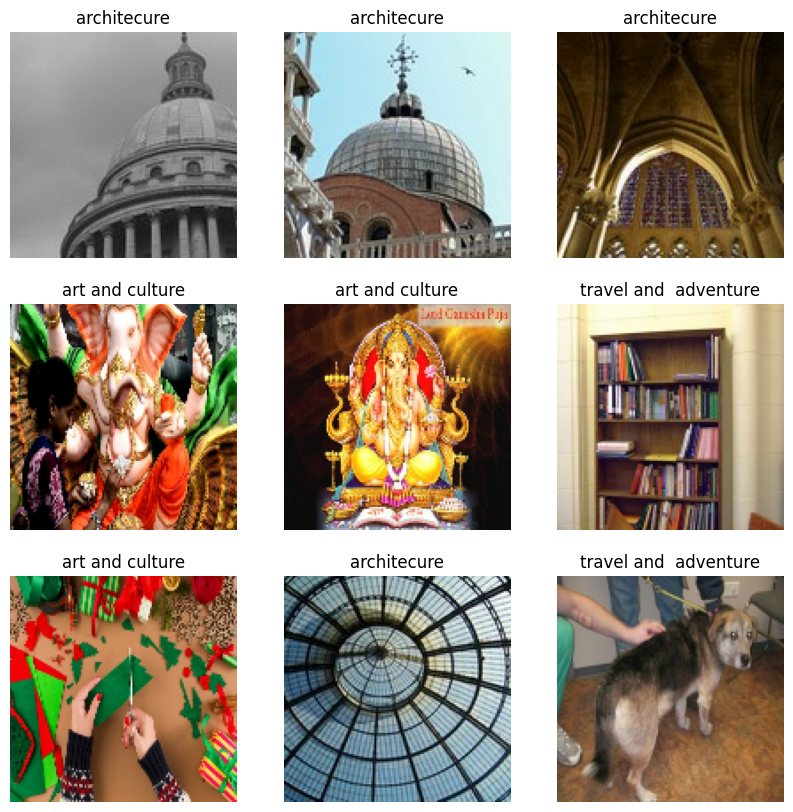

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
        plt.title(class_names[tf.argmax(labels[i]).numpy()])
        plt.axis("off")


Step 5: Optimize the Dataset for Training

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator instance
rgb_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.2  # Assuming you want a validation split
)

# Define dataset path
dataset_path = "/content/drive/MyDrive/images"  # Change this to your actual dataset path
BATCH_SIZE = 32  # Define your batch size

train_rgb_generator_256 = rgb_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT_256, IMG_WIDTH_256),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

train_rgb_generator_200 = rgb_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT_200, IMG_WIDTH_200),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)


Found 2417 images belonging to 3 classes.
Found 2417 images belonging to 3 classes.


Found 2417 images belonging to 3 classes.


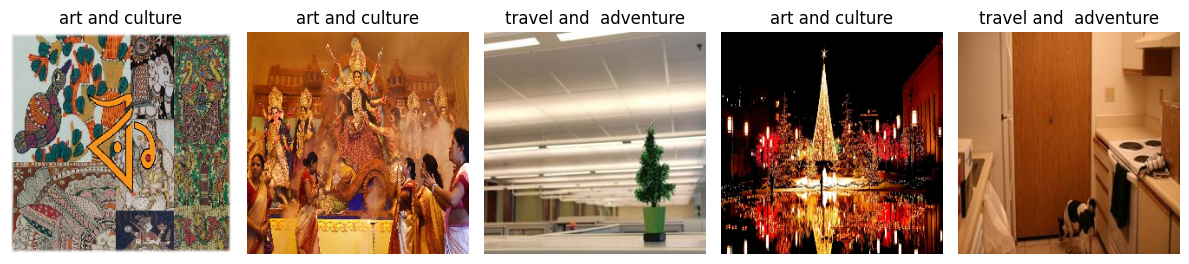

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
IMG_HEIGHT = 256
IMG_WIDTH = 256
BATCH_SIZE = 32  # Define batch size

# Define dataset path
dataset_path = "/content/drive/MyDrive/images"  # Change this to the correct dataset path

# Create an ImageDataGenerator instance
rgb_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Create a training data generator
train_rgb_generator = rgb_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

# Function to display images
def display_rgb_images(generator, num_images=5):
    images, labels = next(generator)
    class_labels = list(generator.class_indices.keys())

    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        label_index = labels[i].argmax()
        plt.title(class_labels[label_index])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images
display_rgb_images(train_rgb_generator, 5)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu'),  # Hidden layer
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 839,107 (3.20 MB)

 Trainable params: 839,107 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10 # Set the number of epochs
)


Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 51s 515ms/step - accuracy: 0.4415 - loss: 33.2584 - val_accuracy: 0.7057 - val_loss: 0.7766
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 48s 505ms/step - accuracy: 0.6243 - loss: 0.9088 - val_accuracy: 0.7577 - val_loss: 0.6351
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 102s 721ms/step - accuracy: 0.7115 - loss: 0.6860 - val_accuracy: 0.8272 - val_loss: 0.4729
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 48s 504ms/step - accuracy: 0.7782 - loss: 0.5703 - val_accuracy: 0.8550 - val_loss: 0.3828
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 102s 714ms/step - accuracy: 0.8183 - loss: 0.4498 - val_accuracy: 0.8881 - val_loss: 0.3273
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 46s 491ms/step - accuracy: 0.8545 - loss: 0.3805 - val_accuracy: 0.8795 - val_loss: 0.3200
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 45s 480ms/step - accuracy: 0.8571 - loss: 0.3680 - val_accuracy: 0.9020 - val_loss: 0.2787
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 45s 477ms/step - accuracy: 0.8785 - loss: 0.3228 - val_a

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - accuracy: 0.8780 - loss: 0.3072
Test Loss: 0.29340046644210815
Test Accuracy: 0.8857994079589844


Model saved successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


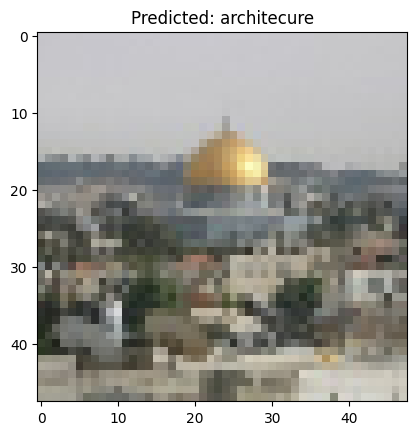

In [ ]:
# Save the model
model.save('cnn_model.h5')
print("Model saved successfully!")

# Predict on a batch of test images
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Predicted: {class_names[tf.argmax(predictions[0]).numpy()]}")
    plt.show()
